<a href="https://colab.research.google.com/github/AngelPn/Fake-News-Detector/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Authors
- 1115201800141 - Αγγελική Παναγοπούλου
- 1115201800142 - Θεοδώρα Παντελιού

# Detection of Fake News with Data Mining


In [69]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Import Libraries

In [77]:
# For data manipulation and analysis
import pandas as pd
import numpy as np
# For preprocessing
import spacy
# For wordcloud generating 
from wordcloud import WordCloud
# For data vizualization 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# For bigrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Load Datasets
Read the data from News_dataset directory using pandas read_csv method. News_dataset stores Fake.csv and True.csv files that keep fake and non-fake news respectively.

In [ ]:
Location = r'/content/gdrive/MyDrive/ΤΕΔ/News_dataset/True.csv'

df_true = pd.read_csv(Location)
df_true.info()
df_true.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
Location = r'/content/gdrive/MyDrive/ΤΕΔ/News_dataset/Fake.csv'

df_fake = pd.read_csv(Location)
df_fake.info()
df_fake.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true = df_true.head(3000)
df_true.info()

df_fake = df_fake.head(3000)
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    3000 non-null   object
 1   text     3000 non-null   object
 2   subject  3000 non-null   object
 3   date     3000 non-null   object
dtypes: object(4)
memory usage: 93.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    3000 non-null   object
 1   text     3000 non-null   object
 2   subject  3000 non-null   object
 3   date     3000 non-null   object
dtypes: object(4)
memory usage: 93.9+ KB


# Preprocessing
Τhe preprocessing is performed using the spaCy library of python as follows:
* Tokenization
* Lemmatization: using spaCy's built-in methods.
* Converting all the words to lower case
* Stopword Removal: using the "is_stop" attribute of the token object.
* Removing Punctuations: using "isalpha" method of string objects.


In [ ]:
# Instantiate English module
nlp = spacy.load("en_core_web_sm")

def preprocessing(df):
  df = df[~df.text.isna() & ~df.title.isna()] # remove NA values

  for i, row in df.iterrows():
    # Create doc object from title
    doc = nlp(row['title'].lower())
    # Filter our tokens
    lemmatized = [token.lemma_ for token in doc if (token.is_stop == False and token.text.isalpha() == True)]
    df.iloc[i]['title'] = ' '.join(lemmatized)
    
    # Create doc object from title
    doc = nlp(row['text'].lower())
    # Filter our tokens
    lemmatized = [token.lemma_ for token in doc if (token.is_stop == False and token.text.isalpha() == True)]
    df.iloc[i]['text'] =  ' '.join(lemmatized)
  
  return df


In [ ]:

df_true_clean = preprocessing(df_true)
df_true_clean.info()
df_true_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    3000 non-null   object
 1   text     3000 non-null   object
 2   subject  3000 non-null   object
 3   date     3000 non-null   object
dtypes: object(4)
memory usage: 117.2+ KB


,title,text,subject,date
0,budget fight loom republicans flip fiscal script,washington reuters head conservative republica...,politicsNews,"December 31, 2017"
1,military accept transgend recruit monday pentagon,washington reuters transgend people allow time...,politicsNews,"December 29, 2017"
2,senior republican senator let mr mueller job,washington reuters special counsel investigati...,politicsNews,"December 31, 2017"
3,fbi russia probe help australian diplomat tip nyt,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017"
4,trump want postal service charge amazon shipment,seattle washington reuters president donald tr...,politicsNews,"December 29, 2017"


In [ ]:
df_fake_clean = preprocessing(df_fake)
df_fake_clean.info()
df_fake_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    3000 non-null   object
 1   text     3000 non-null   object
 2   subject  3000 non-null   object
 3   date     3000 non-null   object
dtypes: object(4)
memory usage: 117.2+ KB


,title,text,subject,date
0,donald trump send embarrass new year eve messa...,donald trump couldn t wish americans happy new...,News,"December 31, 2017"
1,drunk bragging trump staffer start russian col...,house intelligence committee chairman devin nu...,News,"December 31, 2017"
2,sheriff david clarke internet joke threaten po...,friday reveal milwaukee sheriff david clarke c...,News,"December 30, 2017"
3,trump obsessed obama code website image,christmas day donald trump announce work follo...,News,"December 29, 2017"
4,pope francis call donald trump christmas speech,pope francis annual christmas day message rebu...,News,"December 25, 2017"


# Overview of data

## Titles visualization
Wordclouds to visualise the most common titles in fake and non-fake news.

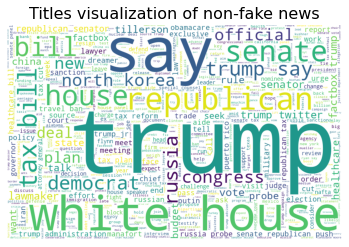

In [ ]:
wordcloud = WordCloud(max_words=1000,width=840, height=540, background_color="white").generate(' '.join(df_true_clean['title'].tolist()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Titles visualization of non-fake news', fontsize = 16)
plt.show()


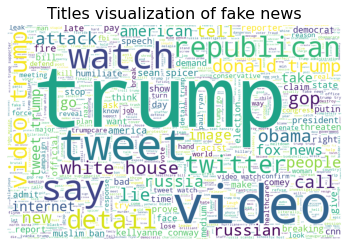

In [ ]:
wordcloud = WordCloud(max_words=1000,width=840, height=540, background_color="white").generate(' '.join(df_fake_clean['title'].tolist()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Titles visualization of fake news', fontsize = 16)
plt.show()


## Average number of characters
The function below gets as arguments a dataframe and a name of a column and returns the average number of characters for that column.

In [ ]:
def average_chars_column(df, column):
  count = []
  for i, row in df.iterrows():
    count.append(len(row[column]))

  return sum(count)/len(count)


Graph that shows the average number of characters in title column for fake and non-fake news.

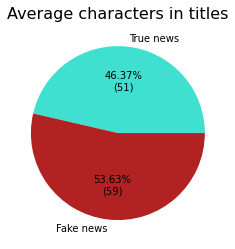

<Figure size 864x864 with 0 Axes>

In [ ]:
av_true = average_chars_column(df_true_clean, 'title')
av_fake = average_chars_column(df_fake_clean, 'title')

plt.pie(x = [av_true, av_fake], 
        labels = ['True news', 'Fake news'],
        colors = ['turquoise', 'firebrick'], 
        autopct = lambda p : '{:.2f}%\n({:.0f})'.format(p, (p/100)*(av_true+av_fake)))
plt.title('Average characters in titles', fontsize = 16)
plt.show()

Graph that shows the average number of characters in text column for fake and non-fake news.

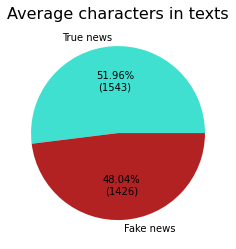

In [ ]:
av_true = average_chars_column(df_true_clean, 'text')
av_fake = average_chars_column(df_fake_clean, 'text')

plt.pie(x=[av_true, av_fake], 
        labels=['True news', 'Fake news'], 
        colors=['turquoise', 'firebrick'], 
        autopct = lambda p : '{:.2f}%\n({:.0f})'.format(p, (p/100)*(av_true+av_fake)))
plt.title('Average characters in texts', fontsize = 16)
plt.show()

## Distribution of the number of words
The function below gets as arguments a dataframe and a name of a column and returns the number of words for that column.

In [ ]:
def wordCount(df, column):
    return (df[column].str.count(' ')+1).sum()


### Dirty datasets
The distribution of number of words for the initial (dirty) datasets.

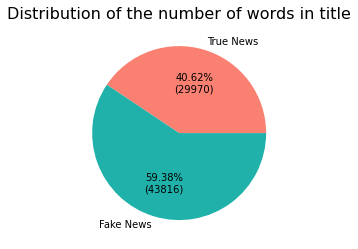

In [ ]:
count_title_true = wordCount(df_true, 'title')
count_title_fake = wordCount(df_fake, 'title')

plt.pie(x=[count_title_true, count_title_fake], 
        labels=['True News', 'Fake News'], 
        colors=['salmon', 'lightseagreen'], 
        autopct = lambda p : '{:.2f}%\n({:.0f})'.format(p, (p/100)*(count_title_fake+count_title_true)))
plt.title('Distribution of the number of words in title', fontsize = 16)
plt.show()

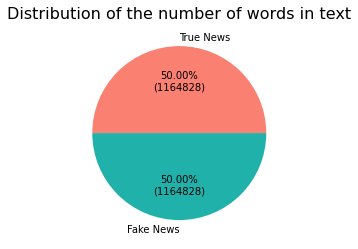

In [ ]:
count_text_true = wordCount(df_true, 'text')
count_text_fake = wordCount(df_true, 'text')

plt.pie(x=[count_text_true, count_text_fake], 
        labels=['True News', 'Fake News'], 
        colors=['salmon', 'lightseagreen'], 
        autopct = lambda p : '{:.2f}%\n({:.0f})'.format(p, (p/100)*(count_text_fake+count_text_true)))
plt.title('Distribution of the number of words in text', fontsize = 16)
plt.show()

### Clean datasets
The distribution of number of words for the clean datasets removed from stopwords.

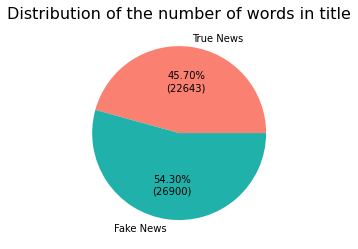

In [ ]:
count_title_true = wordCount(df_true_clean, 'title')
count_title_fake = wordCount(df_fake_clean, 'title')

plt.pie(x=[count_title_true, count_title_fake], 
        labels=['True News', 'Fake News'], 
        colors=['salmon', 'lightseagreen'], 
        autopct = lambda p : '{:.2f}%\n({:.0f})'.format(p, (p/100)*(count_title_fake+count_title_true)))
plt.title('Distribution of the number of words in title', fontsize = 16)
plt.show()

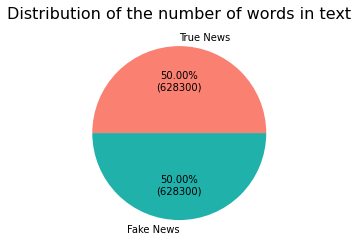

In [ ]:
count_text_true = wordCount(df_true_clean, 'text')
count_text_fake = wordCount(df_true_clean, 'text')

plt.pie(x=[count_text_true, count_text_fake], 
        labels=['True News', 'Fake News'], 
        colors=['salmon', 'lightseagreen'], 
        autopct = lambda p : '{:.2f}%\n({:.0f})'.format(p, (p/100)*(count_text_fake+count_text_true)))
plt.title('Distribution of the number of words in text', fontsize = 16)
plt.show()

## The most common bigrams
The function below returns the most k common bigrams given a dataframe's column.

In [ ]:
def get_topk_bigrams(column, k = 20):
  "  returns bigram_names, bigram_counts "

  # Find bigrams through CountVectorizer
  bow_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', binary=True, max_features=k)
  bow_representation = bow_vectorizer.fit_transform(column)
  print(bow_vectorizer.get_feature_names())

  # To find the most common bigrams find the sum of each column
  bigram_counts = bow_representation.toarray().sum(axis=0)
  print(bigram_counts)

  df_sorted = pd.DataFrame(zip(bigram_counts, bow_vectorizer.get_feature_names()), 
                           columns=['bigram_counts', 'bigram_names'])
  df_sorted.sort_values(by='bigram_counts', inplace=True)

  return df_sorted['bigram_names'], df_sorted['bigram_counts']


Most common bigrams in titles.

['attorney general', 'factbox trump', 'house panel', 'house speaker', 'north korea', 'puerto rico', 'republican senator', 'republican tax', 'russia probe', 'say trump', 'special counsel', 'tax cut', 'tax plan', 'tax reform', 'travel ban', 'trump administration', 'trump jr', 'trump say', 'trump twitter', 'white house']
[ 28  72  27  31  96  34  57  35  50  31  27  42  44  46  36  54  36 110
  76 188]


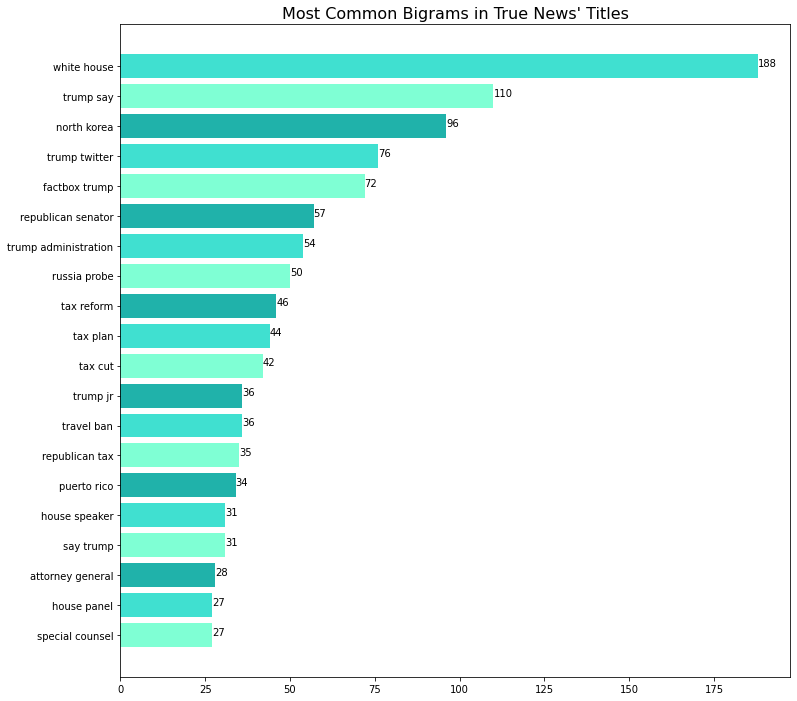

In [71]:
names, counts = get_topk_bigrams(df_true_clean['title'])

plt.figure(figsize=(12,12))
plt.barh(y=names, width=counts, color = ['aquamarine', 'turquoise', 'lightseagreen'])

for index, value in enumerate(counts):
    plt.text(value, index, str(value))

plt.title("Most Common Bigrams in True News' Titles", fontsize = 16)
plt.show()

['donald trump', 'fake news', 'fox news', 'gop rep', 'ivanka trump', 'john mccain', 'kellyanne conway', 'muslim ban', 'new york', 'paul ryan', 'say trump', 'sean spicer', 'trump administration', 'trump jr', 'trump supporter', 'trump try', 'trump tweet', 'watch trump', 'white house', 'white supremacist']
[109  26  65  23  29  24  56  48  23  33  29  60  24  30  24  27  26  39
 105  30]


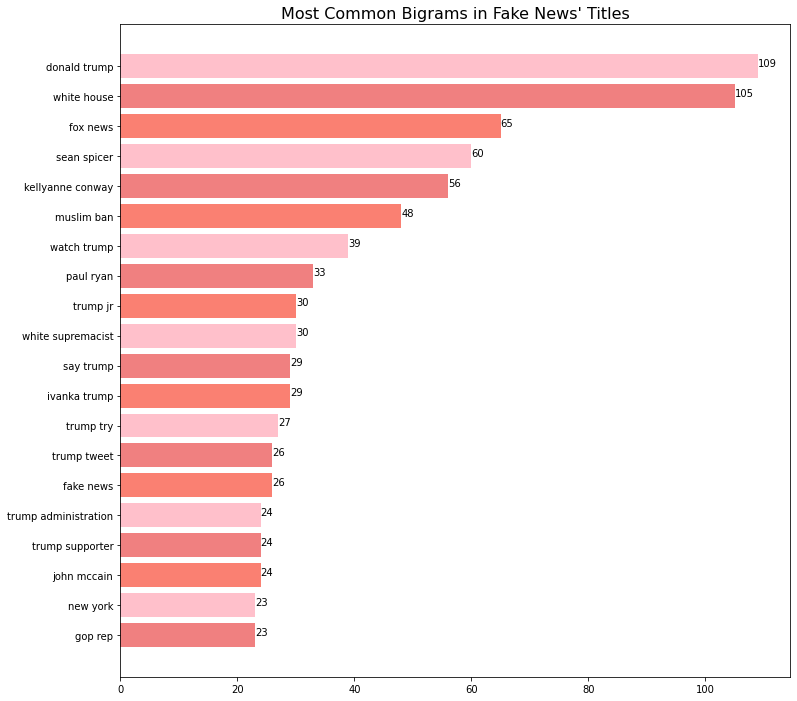

In [ ]:
names, counts = get_topk_bigrams(df_fake_clean['title'])

plt.figure(figsize=(12,12))
plt.barh(y=names, width=counts, color = ['lightcoral', 'pink', 'salmon'])

for index, value in enumerate(counts):
    plt.text(value, index, str(value))
    
plt.title("Most Common Bigrams in Fake News' Titles", fontsize = 16)
plt.show()

Most common bigrams in texts.

['barack obama', 'donald trump', 'house representatives', 'national security', 'new york', 'north korea', 'official say', 'president barack', 'president donald', 'republican senator', 'reuters president', 'say statement', 'say trump', 'tell reporter', 'trump administration', 'trump campaign', 'trump say', 'united states', 'washington reuters', 'white house']
[ 468 2172  685  276  501  277  331  403 2047  392  608  560  342  526
  551  308  507  913 1871 1066]


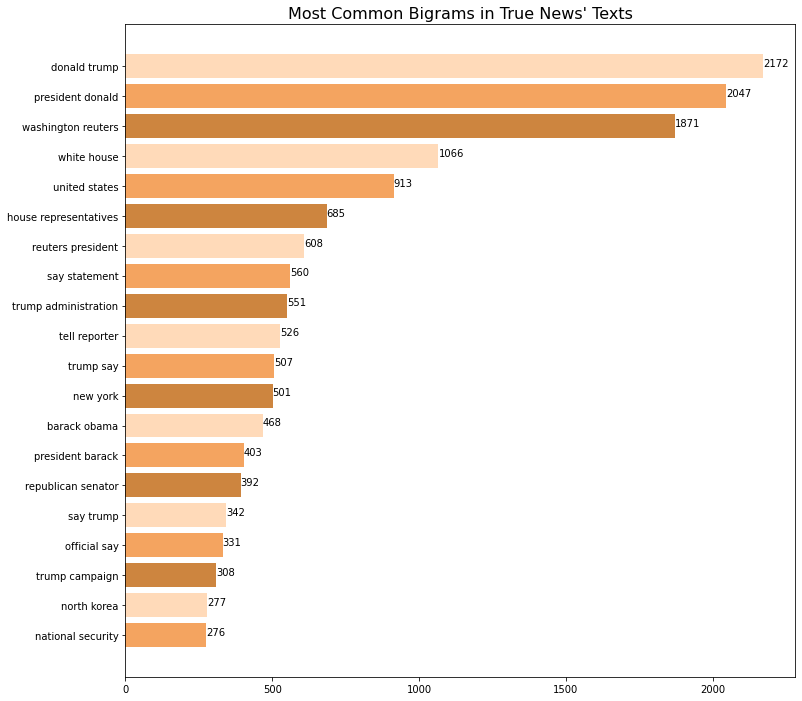

In [ ]:
names, counts = get_topk_bigrams(df_true_clean['text'])

plt.figure(figsize=(12,12))
plt.barh(y=names, width=counts, color = ['sandybrown', 'peachpuff', 'peru'])

for index, value in enumerate(counts):
    plt.text(value, index, str(value))
    
plt.title("Most Common Bigrams in True News' Texts", fontsize = 16)
plt.show()

['american people', 'chip somodevilla', 'donald trump', 'fake news', 'feature image', 'fox news', 'getty image', 'hillary clinton', 'look like', 'new york', 'pool getty', 'president obama', 'president trump', 'screen capture', 'somodevilla getty', 'trump administration', 'trump campaign', 'trump say', 'united states', 'white house']
[ 275  270 2110  267  459  262 2018  294  250  354  262  366  308  285
  256  404  232  352  600 1034]


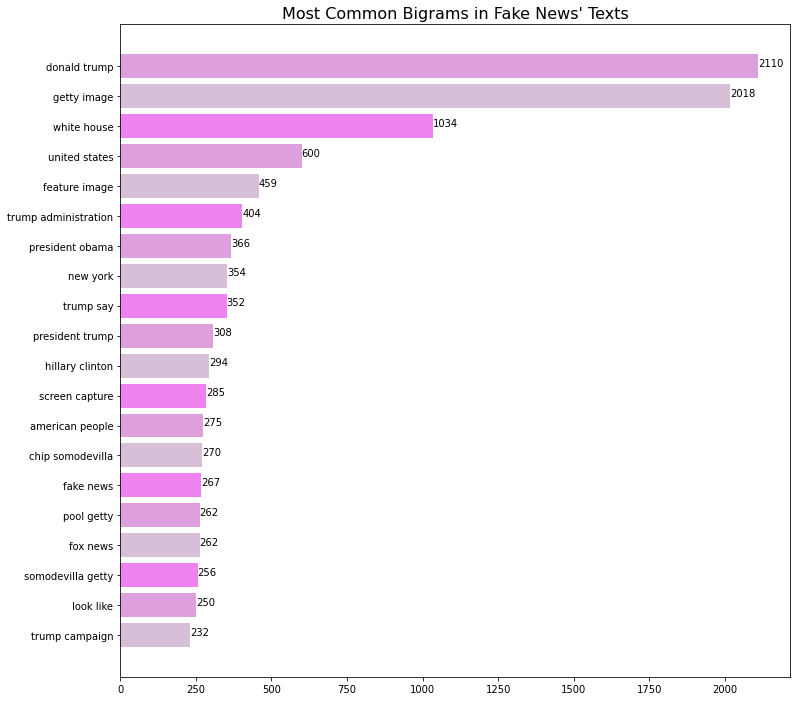

In [ ]:
names, counts = get_topk_bigrams(df_fake_clean['text'])

plt.figure(figsize=(12,12))
plt.barh(y=names, width=counts, color = ['thistle', 'plum', 'violet'])
for index, value in enumerate(counts):
    plt.text(value, index, str(value))
    
plt.title("Most Common Bigrams in Fake News' Texts", fontsize = 16)
plt.show()

# Creation of train and test csv files


In [72]:
dftrain_true = df_true_clean[:2000]
dftest_true = df_true_clean[2001:]

dftrain_fake = df_fake_clean[:2000]
dftest_fake = df_fake_clean[2001:]

dftrain_true.insert(4, 'label', 1)
dftest_true.insert(4, 'label', 1)
dftrain_fake.insert(4, 'label', 0)
dftest_fake.insert(4, 'label', 0)


dftrain = pd.concat([dftrain_true, dftrain_fake], ignore_index=True, sort=False)
dftest = pd.concat([dftest_true, dftest_fake], ignore_index=True, sort=False)

from sklearn.utils import shuffle
dftrain = shuffle(dftrain)
dftest = shuffle(dftest)

Location = r'/content/gdrive/MyDrive/ΤΕΔ/News_dataset/train.csv'
dftrain.to_csv(Location,index=False)

Location = r'/content/gdrive/MyDrive/ΤΕΔ/News_dataset/test.csv'
dftest.to_csv(Location,index=False)

# Classification

In [80]:
bow_vectorizer = CountVectorizer(ngram_range=(1, 2), max_df=1.0, min_df=2, stop_words='english')

bow_representation_train = bow_vectorizer.fit_transform(dftrain.text)
bow_representation_test = bow_vectorizer.fit_transform(dftest.text)

print(bow_vectorizer.get_feature_names())
print(bow_representation.toarray())
print(bow_representation.shape)

['aa', 'aaa', 'aaron', 'aaron bernstein', 'aaron gouveia', 'aarp', 'aarp represent', 'abandon', 'abandon agreement', 'abandon plan', 'abandonment', 'abbott', 'abby', 'abby livingston', 'abc', 'abc host', 'abc nbc', 'abc news', 'abc week', 'abdel', 'abdel fattah', 'abdicate', 'abdul', 'abe', 'abe japan', 'abfoundation', 'abfoundation january', 'abhorrent', 'abhorrent unacceptable', 'abide', 'ability', 'ability accomplish', 'ability block', 'ability combat', 'ability control', 'ability deliver', 'ability fight', 'ability govern', 'ability job', 'ability strike', 'ability trump', 'ability work', 'abject', 'able', 'able accept', 'able accomplish', 'able act', 'able actually', 'able afford', 'able agree', 'able avoid', 'able away', 'able buy', 'able claim', 'able continue', 'able cover', 'able deliver', 'able demonstrate', 'able eliminate', 'able email', 'able enter', 'able forge', 'able identify', 'able job', 'able obtain', 'able open', 'able overcome', 'able participate', 'able pass', 'ab

In [75]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=1.0, min_df=2, stop_words='english')

tfidf_representation = tfidf_vectorizer.fit_transform(dftrain.text)

print(tfidf_vectorizer.get_feature_names())
print(tfidf_representation.toarray())
print(tfidf_representation.shape)

['aahd', 'aaron', 'aaron bernstein', 'aaron burr', 'aarp', 'aarp advocacy', 'aba', 'abadi', 'abadi office', 'abadi say', 'abandon', 'abandon effort', 'abandon end', 'abandon fundamental', 'abandon idea', 'abandon longtime', 'abandon moore', 'abandon paris', 'abandon plan', 'abandon texas', 'abandon trump', 'abandonment', 'abbas', 'abbas trump', 'abbe', 'abbe lowell', 'abbey', 'abbey cruise', 'abbot', 'abbott', 'abbott republican', 'abbott say', 'abbott sunday', 'abby', 'abc', 'abc affiliate', 'abc cbs', 'abc good', 'abc host', 'abc nbc', 'abc news', 'abc week', 'abdel', 'abdel fattah', 'abdication', 'abdoman', 'abdoman police', 'abduct', 'abduct north', 'abduction', 'abdulhamit', 'abdulhamit gul', 'abdullah', 'abdullah ii', 'abe', 'abe leader', 'abe say', 'abe trump', 'abedin', 'abedin aide', 'abedin son', 'abet', 'abhor', 'abhorrent', 'abide', 'abide citizen', 'abide federal', 'abide people', 'abide resolution', 'abide sanction', 'abigail', 'abigail disney', 'ability', 'ability access

In [110]:
trainlabel = np.asarray(dftrain['label'])
traindata = bow_representation_train.toarray()

testlabel = np.asarray(dftest['label'])
testdata = bow_representation_test.toarray()
print(traindata.shape)

# Βρείτε (μέσω των συναρτήσεων που αναφέρθηκαν) την μέση τιμή και την τυπική απόκλιση 
# του trainData

means = np.mean(traindata, axis=0)
print(means.shape)
stds = np.std(traindata, axis=0)
print(stds.shape)
stds

# Κανονικοποιήστε το trainData και το testdata, αφαιρώντας από κάθε τιμή την μέση τιμή και διαιρώντας 
# με την τυπική απόκλιση

traindata = (traindata - means)/stds
# testdata = (testdata - means)/stds

# Εκτυπώστε την μέση τιμή και την τυπική απόκλιση. Τι παρατηρείτε;

print(np.mean(traindata,0))
print(np.std(traindata,0))

(4000, 103815)
(103815,)
(103815,)
[ 3.51689164e-16  8.95956920e-16 -6.02639466e-16 ... -1.00398856e-15
  1.58638727e-16  3.34924796e-16]
[1. 1. 1. ... 1. 1. 1.]
